In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('spam.tsv', sep='\t')

In [25]:
# DATA PREPROCESSING

In [26]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [27]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [28]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [29]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [30]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [31]:
df['label'].value_counts()/ len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [33]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

ham.shape, spam.shape

((4825, 4), (747, 4))

In [39]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

In [40]:
data = ham.append(spam, ignore_index = True)

data.shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37776\2712986221.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index = True)


(1494, 4)

In [41]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [42]:
data.head()

,label,message,length,punct
0,ham,Haha okay... Today weekend leh...,34,6
1,ham,Did you get any gift? This year i didnt get an...,60,2
2,ham,Pls help me tell Ashley that i cant find her n...,54,0
3,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...,212,13
4,ham,Lol! Nah wasn't too bad thanks. Its good to b ...,136,6


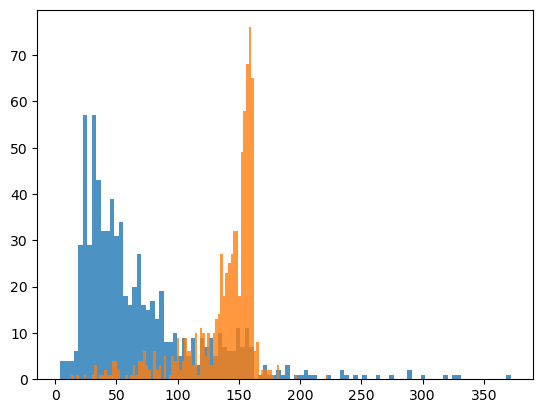

In [52]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.8 )
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.8 )

plt.show()

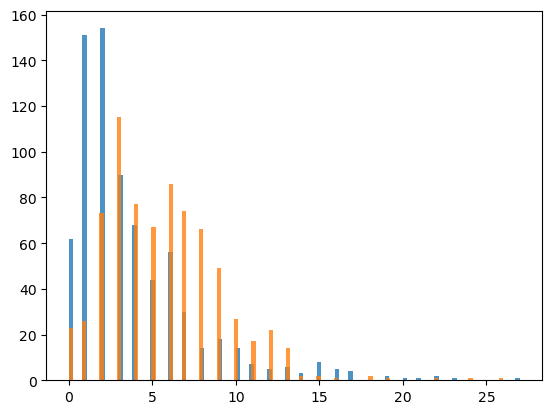

In [53]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.8 )
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.8 )

plt.show()

In [54]:
data

,label,message,length,punct
0,ham,Haha okay... Today weekend leh...,34,6
1,ham,Did you get any gift? This year i didnt get an...,60,2
2,ham,Pls help me tell Ashley that i cant find her n...,54,0
3,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...,212,13
4,ham,Lol! Nah wasn't too bad thanks. Its good to b ...,136,6
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split (data['message'], data['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [59]:
X_train.shape

(1045,)

In [60]:
X_test.shape

(449,)

In [ ]:
# BUILDING THE MODEL (RANDOM FOREST)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [75]:
classifier = Pipeline([('tfidf', TfidfVectorizer()),('classifier', RandomForestClassifier(n_estimators = 100))])

In [76]:
classifier.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [77]:
# PREDICTING THE RESULTS (RANDOM FOREST)

In [85]:
Y_pred = classifier.predict(X_test)

In [86]:
Y_test, Y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',

In [80]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [87]:
accuracy_score(Y_test, Y_pred)

0.9443207126948775

In [88]:
confusion_matrix(Y_test, Y_pred)

array([[222,   5],
       [ 20, 202]], dtype=int64)

In [89]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [90]:
# BUILDING THE MODEL (SVM)

In [91]:
from sklearn.svm import SVC

In [93]:
svm = Pipeline([('tfidf', TfidfVectorizer()),('classifier', SVC (C = 100, gamma = 'auto'))])

In [95]:
svm.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
# PREDICTING THE RESULTS (SVM)

In [96]:
Y_pred = svm.predict(X_test)

In [97]:
accuracy_score(Y_test, Y_pred)

0.9354120267260579

In [100]:
confusion_matrix(Y_test, Y_pred)

array([[222,   5],
       [ 24, 198]], dtype=int64)

In [101]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       227
        spam       0.98      0.89      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.93      0.94       449
weighted avg       0.94      0.94      0.94       449



In [102]:
test1 = ['Hello, You are learning natural language processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [103]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [104]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
